# Decision Tree

Objective: Predicting Velocity from NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack  
Dataset: airfoil.dat  
Ref: NA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv("airfoil.dat", delimiter="\t", header=None)
print('Dataset size', data.shape)
data.head()

Dataset size (1503, 6)


,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [2]:
data.columns = ['frequency','attackAngle','chordLength','velocity','suctionThick','soundScaled']
data.head()

,frequency,attackAngle,chordLength,velocity,suctionThick,soundScaled
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
frequency       1503 non-null int64
attackAngle     1503 non-null float64
chordLength     1503 non-null float64
velocity        1503 non-null float64
suctionThick    1503 non-null float64
soundScaled     1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


## Data Exploration

39.6    480
71.3    465
31.7    281
55.5    277
Name: velocity, dtype: int64


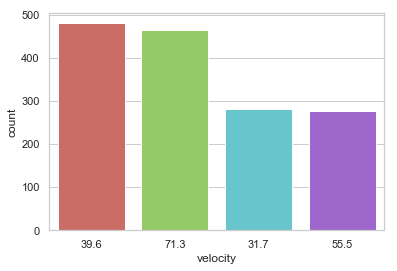

In [4]:
print(data['velocity'].value_counts())

sns.countplot(x='velocity',data = data, palette='hls',order = data['velocity'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Correlation

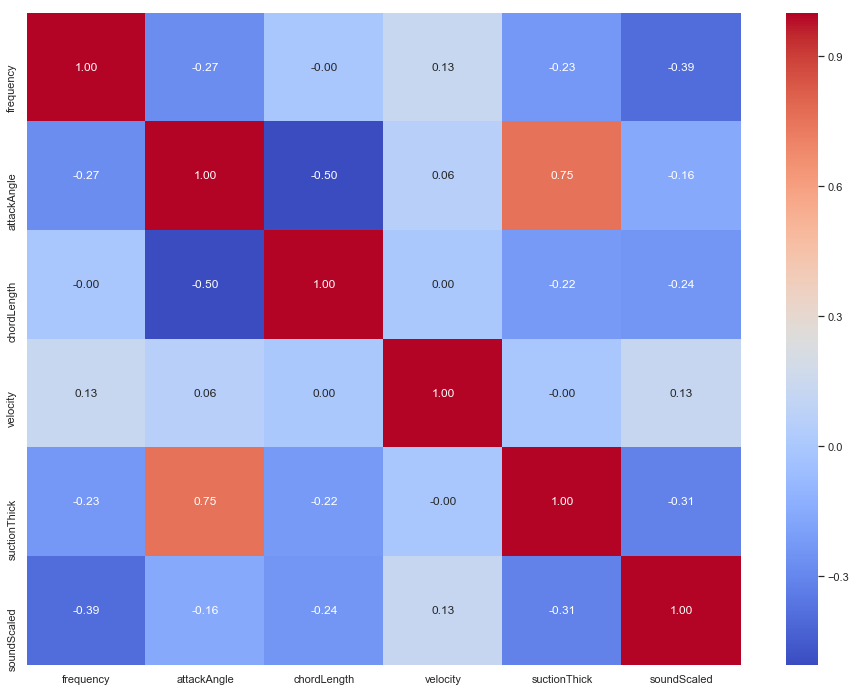

In [5]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [6]:
corr_rank = data.corr()
corr_rank["velocity"].sort_values(ascending=False)

velocity        1.000000
frequency       0.133664
soundScaled     0.125103
attackAngle     0.058760
chordLength     0.003787
suctionThick   -0.003974
Name: velocity, dtype: float64

## Data Processing and Selection

In [7]:
X = data[['frequency','attackAngle','chordLength','suctionThick','soundScaled']].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (1503, 5)


array([[8.00000e+02, 0.00000e+00, 3.04800e-01, 2.66337e-03, 1.26201e+02],
       [1.00000e+03, 0.00000e+00, 3.04800e-01, 2.66337e-03, 1.25201e+02]])

In [8]:
data["velocity"] = data["velocity"].astype('category')
data["velocityCat"] = data["velocity"].cat.codes

y = data["velocityCat"]
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (1503,)


0    3
1    3
2    3
3    3
4    3
Name: velocityCat, dtype: int8

## Split Train Test

In [9]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X,y,test_size=0.3,random_state=3)

print("X TRAIN Set: ", X_trainset.shape, y_trainset.shape)
print("X TEST Set : ", X_testset.shape, y_testset.shape)

X TRAIN Set:  (1052, 5) (1052,)
X TEST Set :  (451, 5) (451,)


## Decision Tree

In [10]:
#specify criterion='entropy' see information gain of each node (using gini given same result)
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

#fit with data
DTree.fit(X_trainset, y_trainset)

#making prediction and store in predTree
predTree = DTree.predict(X_testset)
print(predTree.shape)
predTree

(451,)


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [12]:
#calculate model accuracy
from sklearn import metrics
print("Decision Tree's Accuracy: ", round(metrics.accuracy_score(y_testset, predTree),5))
print("Accuracy score 2        : ", round(DTree.score(X_testset, y_testset),5))

Decision Tree's Accuracy:  0.34812
Accuracy score 2        :  0.34812
